<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from cvxopt import matrix, solvers

Create Dataset:

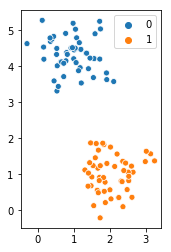

In [2]:
KERNEL = 'linear'
POLY_P = 3
CASE = 1

if CASE == 1:
  # Linearly Separable
  X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.5, random_state=0)
elif CASE == 2:
  # Simple Linearly Separable
  X = np.array([[0, 1], [1, 0], [2, 2], [3, 3]])
  y = np.array([0, 0, 1, 1]).reshape((4,))
elif CASE == 3:
  # Not Linearly Separable
  X = np.array([[1, 0], [0, 1], [2, 1], [1, 2]])
  y = np.array([0, 1, 1, 0])

m = X.shape[0]
  
fig, ax = plt.subplots()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
ax.set_aspect(1.0)
plt.show()

y = 2*y - 1  # Change y to be -1 and 1 instead of 0 and 1


Create P, q, G, h, A, and b matrices for QP optimization problem (https://cvxopt.org/userguide/coneprog.html)

In [0]:
def kernel(x1, x2, type, p=3):
  if type=='linear':
    return np.dot(x1, x2.T)
  elif type=='poly':
    return (1+np.dot(x1,x2.T))**p

print_matrices = False

P = np.zeros((m, m))
for i in range(m):
  for j in range(m):
    P[i, j] = y[i]*y[j]*kernel(X[i], X[j], KERNEL, p=POLY_P)

P = matrix(P)
q = matrix(-np.ones((m, 1)))
G = matrix(-np.eye(m))
h = matrix(np.zeros(m))
A = matrix(y.reshape(1, m).astype('double'))
b = matrix(np.zeros(1))

if print_matrices:
  print(f'P=\n{P}\n')
  print(f'q=\n{q}\n')
  print(f'G=\n{G}\n')
  print(f'h=\n{h}\n')
  print(f'A=\n{A}\n')
  print(f'b=\n{b}\n')

Solve System

In [4]:
solvers.options['abstol'] = 1e-12
solvers.options['reltol'] = 1e-12
solvers.options['feastol'] = 1e-12
sol = solvers.qp(P, q, G, h, A, b)
lambdas = np.array(sol['x']).reshape(m)

     pcost       dcost       gap    pres   dres
 0: -7.7669e+00 -1.2953e+01  2e+02  2e+01  2e+00
 1: -6.3538e+00 -2.3945e+00  2e+01  2e+00  2e-01
 2: -3.1209e-01 -1.2118e+00  9e-01  2e-15  1e-14
 3: -5.9417e-01 -8.2689e-01  2e-01  5e-16  4e-15
 4: -7.4021e-01 -8.1924e-01  8e-02  1e-16  2e-15
 5: -8.0210e-01 -8.0320e-01  1e-03  1e-16  2e-15
 6: -8.0294e-01 -8.0295e-01  1e-05  1e-16  2e-15
 7: -8.0294e-01 -8.0294e-01  1e-07  1e-16  2e-15
 8: -8.0294e-01 -8.0294e-01  1e-09  2e-16  2e-15
 9: -8.0294e-01 -8.0294e-01  1e-11  3e-16  3e-15
10: -8.0294e-01 -8.0294e-01  1e-13  3e-16  2e-15
Optimal solution found.


Calculate $b$

In [5]:
S = np.where(lambdas > 1e-5)[0][0]
b = y[S] - sum(lambdas * y * kernel(X, X[S], KERNEL, p=POLY_P).flatten())
print(b)

3.0307342900430214


Graph Decision Boundary

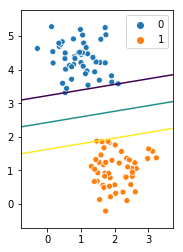

In [6]:
x_min = min(X[:, 0]) - 0.5
x_max = max(X[:, 0]) + 0.5
y_min = min(X[:, 1]) - 0.5
y_max = max(X[:, 1]) + 0.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
d = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)
num_points = d.shape[0]

Z = np.sum(lambdas.reshape(-1, 1) * y.reshape(-1, 1) * kernel(X, d, KERNEL, p=POLY_P), axis=0) + b
Z = Z.reshape(xx.shape)

y = (y+1)//2

fig, ax = plt.subplots()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
ax.contour(xx, yy, Z, levels=[-1, 0, 1])
ax.set_aspect(1.0)
plt.show()